<h1><center>YanP_01</center></h1>


<h3 align="center">Oct 9, 2022</h3> 


0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 1

In [26]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.2
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math
np.random.seed(1337)

1. Bad data

In [28]:
url = 'https://gist.githubusercontent.com/inumanag/713fb4367cacfeab82b07104482e73a7/raw/76a7ab7503476ce8f6a25269dc2755c13bbf5c36/elections.csv'
df = pd.read_csv(url)
print(df['POPULATION'].str.contains('<bound').value_counts())
df.loc[df['POPULATION'].str.contains('<bound'), 'POPULATION'] = 0

False    3140
True        5
Name: POPULATION, dtype: int64


From output, we observed there are 5 such cells in the 'POPULATION'.

2. Split

In [29]:
url = 'https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv'
df2 = pd.read_csv(url, encoding= 'unicode_escape')

df2.columns = df2.columns.str.upper() # This code is to make all df2's features capitalized. Ref: "https://pandas.pydata.org/docs/reference/api/pandas.Series.str.upper.html" and "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"
df3 = pd.merge(df, df2) # Ref: https://pandas.pydata.org/docs/user_guide/merging.html

df3 = df3.drop(columns = 'FIPS')

3. Aggregate

3.1 Aggregate all education-related features

In [30]:
# Aggregate all education-related features
df = df3
df = df.rename(columns={"PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,": "LessThenHighSchool", "PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,": "HighSchool", "PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,": "College", "PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,": "Bachelor"})
education_features = ["LessThenHighSchool", "HighSchool", "College", "Bachelor"]

# Find the third most represented feature
temp_df = df[education_features].T.transform(np.sort) # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html, https://numpy.org/doc/stable/reference/generated/numpy.sort.html and https://stackoverflow.com/questions/41507040/sort-all-columns-of-a-dataframe
third_M_features = temp_df.iloc[1]
feature_list = [] # contains every row's third most feature

# Next, find the corresponding column name of each row's third most feature, and use the column names as the new features in EDUCATION.
for i in range(df.shape[0]):
  temp = []
  temp_df = df.iloc[i:i+1, 1:5]
  temp = list(temp_df.columns[temp_df.loc[i].isin([third_M_features[i]])])
  feature_list.append(str(temp[0]))
df['EDUCATION'] = feature_list
df = df.drop(columns = education_features)

3.2 Aggregate all religion-based features

In [31]:
# Aggregate all religion-based features
temp_df = df.iloc[0:, 3:20] # narrow down the dataframe
third_M_features = temp_df.T.transform(np.sort).iloc[-3] # To find the third most represented feature
feature_list = [] # contains every row's third most feature

# Next, find the corresponding column name of each row's third most feature, and use the column names as the new features in RELIGION.
for i in range(df.shape[0]):
  temp = []
  temp_df = df.iloc[i:i+1, 3:20]
  temp = list(temp_df.columns[temp_df.loc[i].isin([third_M_features[i]])])
  feature_list.append(str(temp[0]))
df['RELIGION'] = feature_list
df = df.drop(columns = ['AMISH', 'BUDDHIST', 'CATHOLIC', 'CHRISTIAN GENERIC', 'EASTERN ORTHODOX', 'HINDU', 'JEWISH', 'MAINLINE CHRISTIAN', 'MORMON', 'MUSLIM', 'NON-CATHOLIC CHRISTIAN', 'OTHER', 'OTHER CHRISTIAN', 'OTHER MISC', 'PENTECOSTAL / CHARISMATIC', 'PROTESTANT DENOMINATION', 'ZOROASTRIAN'])

3.3 Aggregate all age-related features

In [32]:
# Aggregate all age-related features
# obtain the dataframe for AGE OLD (55 - 85+ years of age)
df_old = df.iloc[0:, 28:35]
# obtain the dataframe for AGE YOUNG (0 - 24 years of age)
df_young = df.iloc[0:, 17:22]
# obtain the dataframe for AGE ADULT (25 - 54 years of age)
df_adult = df.iloc[0:, 22:28]

# aggregate all features into a single numerical feature: AGE OLD
df_old = df_old.apply(np.sum, axis=1) 
df['AGE OLD'] = df_old

# aggregate all features into a single numerical feature: AGE YOUNG
df_young = df_young.apply(np.sum, axis=1) 
df['AGE YOUNG'] = df_young

# aggregate all features into a single numerical feature: AGE ADULT
df_adult = df_adult.apply(np.sum, axis=1) 
df['AGE ADULT'] = df_adult

df = df.drop(columns = ['0-4 RATE',  '5-9 RATE',  '10-14 RATE',  '15-19 RATE',  '20-24 RATE',  '25-29 RATE',  '30-34 RATE',  '35-39 RATE',  '40-44 RATE',  '45-49 RATE',  '50-54 RATE',  '55-59 RATE',  '60-64 RATE',  '65-69 RATE',  '70-74 RATE',  '75-79 RATE',  '80-84 RATE',  '85+ RATE'])


3.4 Aggregate different ethnic and racial groups

In [33]:
# Aggregate different ethnic and racial groups
female_columns = ['WHITE FEMALE RATE', 'BLACK FEMALE RATE', 'NATIVE AMERICAN FEMALE RATE', 'ASIAN FEMALE RATE', 'HAWAIIAN PACIFIC FEMALE RATE', 'MULTI FEMALE RATE']
male_columns = ['WHITE MALE RATE', 'BLACK MALE RATE', 'NATIVE AMERICAN MALE RATE', 'ASIAN MALE RATE', 'HAWAIIAN PACIFIC MALE RATE', 'MULTI MALE RATE']
df_female = df[female_columns]
df_male = df[male_columns]

# Find the second most represented feature
temp_df_female = df_female.T.transform(np.sort)
temp_df_male = df_male.T.transform(np.sort)
second_M_female_features = temp_df_female.iloc[-2]
second_M_male_features = temp_df_male.iloc[-2]

female_feature_list = [] # contains every row's second most feature
male_feature_list = []

# Next, find the corresponding column name of each row's seconf most feature, and use the column names as the new features in ETHNIC MALE or ETHNIC FEMALE.
for i in range(df.shape[0]):
  temp = []
  temp_df_female = df_female.iloc[i:i+1, :]
  temp_df_male = df_male.iloc[i:i+1, :]
  
  temp = list(temp_df_female.columns[temp_df_female.loc[i].isin([second_M_female_features[i]])])
  female_feature_list.append(str(temp[0]))

  temp = list(temp_df_male.columns[temp_df_male.loc[i].isin([second_M_male_features[i]])])
  male_feature_list.append(str(temp[0]))
df['ETHNIC FEMALE'] = [i.replace(" RATE", "") for i in female_feature_list]
df['ETHNIC MALE'] = [i.replace(" RATE", "") for i in male_feature_list]
df = df.drop(columns = female_columns)
df = df.drop(columns = male_columns)
df = df.drop(columns = ['WHITE RATE', 'BLACK RATE', 'NATIVE AMERICAN RATE', 'HAWAIIAN PACIFIC RATE', 'MULTI RATE'])


3.5 Remove some features

In [34]:
# Remove some features
df = df.drop(columns=['POVERTY UNDER 18 PCT', 'AGE TOTAL POP'])

4. Rename

In [35]:
# snake case renaming
df.columns = df.columns.str.replace(" ", "_").str.lower()
df = df.rename(columns={"name": "county"})

5. Normalize

5.1 z~score normalization

In [36]:
# X = (X − μ)/σ
df['population'] = df['population'].astype('int') # cast string to int for every feature in population

normalization_list=['pop_estimate', 'per_capita_inc', 'population', 'med_hhinc', 'area_in_square_miles_-_total_area', 'density_per_square_mile_of_land_area_-_population']

for i in normalization_list:
  mu = df[i].mean(axis=0)
  sigma = df[i].std(axis=0)
  df[i] = df[i].apply(lambda x: (x - mu) / sigma)


5.2 0-1 scale

In [37]:
# 0-1 scale
scale_list = ['unemployment_rate', 'poverty_all_ages_pct', 'deep_pov_all', 'deep_pov_children']

for i in scale_list:
  df[i] = df[i].apply(lambda x: x/100)

6. Summary

6.1 Summary of pop_estimate and population features

In [38]:
# Summary of pop_estimate and population features
print("The mean of pop_estimate:", df['pop_estimate'].mean(axis=0))
print("The standard deviation of pop_estimate:", df['pop_estimate'].std(axis=0))
print('-------------------------------------------------------------------------')
print("The mean of population:", df['population'].mean(axis=0))
print("The standard deviation of population:", df['population'].std(axis=0))
corr_score = df['pop_estimate'].corr(df['population'])
print("population and pop_estimate has the correlation score :", corr_score)
if corr_score > 0.9:
  df = df.drop(columns = ['pop_estimate'])

The mean of pop_estimate: 3.394312431975001e-18
The standard deviation of pop_estimate: 0.9999999999999999
-------------------------------------------------------------------------
The mean of population: 2.2628749546500005e-18
The standard deviation of population: 1.0
population and pop_estimate has the correlation score : 0.9974332586878153


Summary:

After z-score normalization, 'pop_estimate' has a mean close to 0, and a standard deviation close to 1. 

'population' has a mean close to 0, and a standard deviation of 1 as well. 

'population' and 'pop_estimate' has the correlation score of 0.9915591351404104( > 0.9). Hence, they are correlated. We drop the pop_estimate feature since the correlation score above 0.9

6.2 Summary of voter_turnout_rate and unemployment_rate features

In [39]:
# Summary of voter_turnout_rate and unemployment_rate features
print("The median of voter_turnout_rate:", df['voter_turnout_rate'].median(axis=0))
print("The quartiles of voter_turnout_rate:\nQ1(0.25) =", df['voter_turnout_rate'].quantile(q=0.25), '\nQ2(0.50) =', df['voter_turnout_rate'].quantile(q=0.50), '\nQ3(0.75) =', df['voter_turnout_rate'].quantile(q=0.75))
print("The IQR of voter_turnout_rate:", df['voter_turnout_rate'].quantile(q=0.75) - df['voter_turnout_rate'].quantile(q=0.25))
print('-------------------------------------------------------------------------')
print("The median of unemployment_rate:", df['unemployment_rate'].median(axis=0))
print("The quartiles of unemployment_rate:\nQ1(0.25) =", df['unemployment_rate'].quantile(q=0.25), '\nQ2(0.50) =', df['unemployment_rate'].quantile(q=0.50), '\nQ3(0.75) =', df['unemployment_rate'].quantile(q=0.75))
print("The IQR of unemployment_rate:", df['unemployment_rate'].quantile(q=0.75) - df['unemployment_rate'].quantile(q=0.25))

The median of voter_turnout_rate: 0.437952565
The quartiles of voter_turnout_rate:
Q1(0.25) = 0.38483760175 
Q2(0.50) = 0.437952565 
Q3(0.75) = 0.4916421425
The IQR of voter_turnout_rate: 0.10680454075000001
-------------------------------------------------------------------------
The median of unemployment_rate: 0.053
The quartiles of unemployment_rate:
Q1(0.25) = 0.042 
Q2(0.50) = 0.053 
Q3(0.75) = 0.065
The IQR of unemployment_rate: 0.023


Summary:

'voter_turnout_rate' has a median = 0.44 and Q1 = 0.38, Q2 = 0.44, Q3 =0.49. The IQR of 'voter_turnout_rate' is Q3 - Q1 = 0.11.

'unemployment_rate' has a median = 0.053 and Q1 = 0.042, Q2 = 0.053, Q3 =0.065. The IQR of 'unemployment_rate' is Q3 - Q1 = 0.023.

6.3 Modes of religion and ethnic female features

In [40]:
# Modes of religion and ethnic female features
print("Summary:")
print("The mode of the 'religion' feature is:", list(df['religion'].mode())[0])
print("The mode of the 'ethnic_female' feature is:", list(df['ethnic_female'].mode())[0])

Summary:
The mode of the 'religion' feature is: MAINLINE CHRISTIAN
The mode of the 'ethnic_female' feature is: BLACK FEMALE


Summary:

The mode of the 'religion' feature is: MAINLINE CHRISTIAN

The mode of the 'ethnic_female' feature is: BLACK FEMALE

7. Visualize

7.1 Histograms

religion histogram

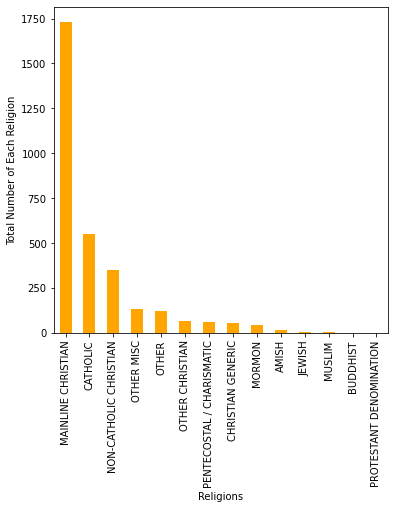

In [41]:
# religion histogram
df['religion'].value_counts().plot.bar(color='orange', figsize=[6,6])
plt.xlabel('Religions')
plt.ylabel('Total Number of Each Religion')
plt.show()

ethnic_male histogram

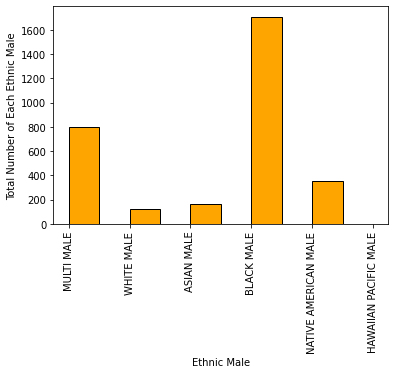

In [42]:
# ethnic_male histogram
plt.hist(df['ethnic_male'], bins = 10, edgecolor='black', linewidth=1.0, color='orange')
plt.xlabel('Ethnic Male')
plt.ylabel('Total Number of Each Ethnic Male')
plt.xticks(rotation='vertical')
plt.show()

ethnic_female histogram

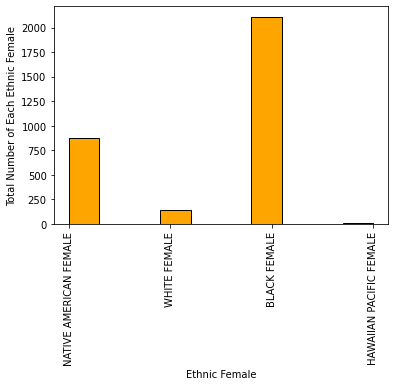

In [43]:
# ethnic_female histogram
plt.hist(df['ethnic_female'], bins = 10, edgecolor='black', linewidth=1.0, color='orange')
plt.xlabel('Ethnic Female')
plt.ylabel('Total Number of Each Ethnic Female')
plt.xticks(rotation='vertical')
plt.show()

education histogram

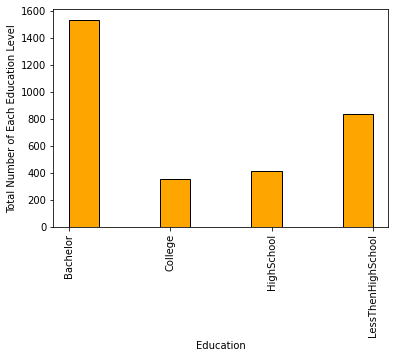

In [44]:
# education histogram
plt.hist(df['education'], bins = 10, edgecolor='black', linewidth=1.0, color='orange')
plt.xlabel('Education')
plt.ylabel('Total Number of Each Education Level')
plt.xticks(rotation='vertical')
plt.show()

7.2 2D Scatter Plot

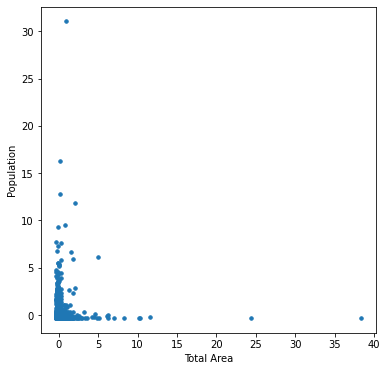

In [45]:
# 2D scatter plot
df.plot(x='area_in_square_miles_-_total_area', y='population', kind='scatter', s=12, figsize=[6,6])
plt.xlabel('Total Area')
plt.ylabel('Population')
plt.show()

7.3 Box Plot

Box plot of unemployment_rate

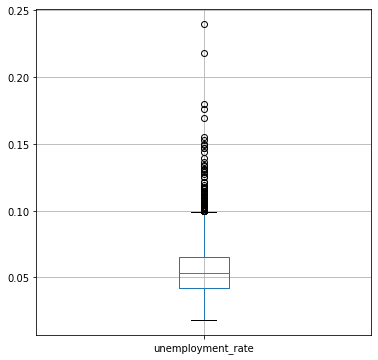

In [46]:
# Box plot of unemployment_rate
df.boxplot(column = 'unemployment_rate', figsize=[6,6])

Box plot of voter_turnout_rate

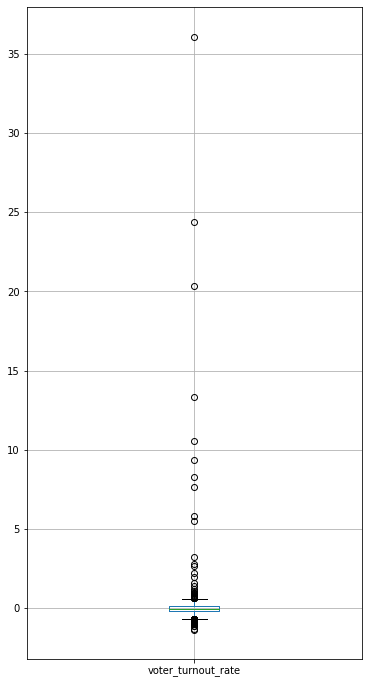

In [47]:
# Box plot of voter_turnout_rate
temp = list(df['voter_turnout_rate']) # use temp to save the orginal samples since we only normalize voter_turnout_rate for this subquestion.
 # normalize voter_turnout_rate
mu = df['voter_turnout_rate'].mean(axis=0)
sigma = df['voter_turnout_rate'].std(axis=0)
df['voter_turnout_rate'] = df['voter_turnout_rate'].apply(lambda x: (x - mu) / sigma)
# plot a boxplot
df.boxplot(column = 'voter_turnout_rate', figsize=[6,12])
# restore samples
df['voter_turnout_rate'] = temp

8. Conflict

Yes, there are contradicting and nonsensical samples. 

1. In the 'population' feature there are 5 values contain "<bound method..." which has large data size compare to other data. Also, these 5 values are meaningless to us, since the rest of the values have integer datatype which is very different from them.

2. 'ASIAN FEMALE RATE' and 'MULTI FEMALE RATE' features have all values of 0 which is nonsensical.

3. '65-69 RATE' and 'ZOROASTRIAN' features also have all values of 0 which is nonsensical.

4. For the age rates features '0-4 rate', '5-9 rate', '10-14 rate' and '15-19 rate', all samples under these features are nonsensical samples because the legal voting age in U.S. is 18.

I can only find 6 such samples.

9. Labels

I think the name of the label vector is 'democrat'. We will use other features to predict each county support democracy or not.

End: Export the result

In [48]:
df.to_csv('elections_clean.csv', encoding = 'utf-8-sig') 
files.download('elections_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>